**Loan Prediction**

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv("Loan Prediction Dataset.csv", nrows=100)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0,115.0,180.0,1.0,Semiurban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100.00000,100.000000,95.000000,95.000000,92.000000
mean,4122.83000,1700.550000,134.221053,341.684211,0.836957
std,2258.89434,1947.668891,63.456163,61.309342,0.371429
min,1000.00000,0.000000,17.000000,60.000000,0.000000
25%,2636.00000,0.000000,99.500000,360.000000,1.000000
50%,3598.00000,1558.500000,120.000000,360.000000,1.000000
75%,4710.00000,2394.500000,154.500000,360.000000,1.000000
max,12841.00000,10968.000000,349.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            100 non-null    object 
 1   Gender             99 non-null     object 
 2   Married            100 non-null    object 
 3   Dependents         100 non-null    object 
 4   Education          100 non-null    object 
 5   Self_Employed      94 non-null     object 
 6   ApplicantIncome    100 non-null    int64  
 7   CoapplicantIncome  100 non-null    int64  
 8   LoanAmount         95 non-null     float64
 9   Loan_Amount_Term   95 non-null     float64
 10  Credit_History     92 non-null     float64
 11  Property_Area      100 non-null    object 
 12  Loan_Status        100 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 10.3+ KB


## Preprocessing the dataset

In [ ]:
# find the null values
df.isnull().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Creation of new attributes

In [ ]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0,134.221053,360.0,1.0,Urban,Y,5849
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,6000


In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.0,2,1
1,1,1,1,0,0,1.0,0,0
2,1,1,0,0,1,1.0,2,1
3,1,1,0,1,0,1.0,2,1
4,1,0,0,0,0,1.0,2,1


## Train-Test Split

In [ ]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

## Model Training

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 84.0
Cross validation is 79.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 80.0
Cross validation is 75.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 80.0
Cross validation is 72.00000000000001


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 84.0
Cross validation is 73.00000000000001


## Hyperparameter tuning

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 84.0
Cross validation is 79.0


## Confusion Matrix

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  4],
       [ 1, 15]], dtype=int64)

<AxesSubplot:>

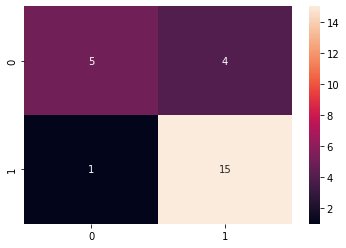

In [ ]:
sns.heatmap(cm, annot=True)